<a href="https://colab.research.google.com/github/Cristianpagella/ProyectoDS/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('/content/drive/MyDrive/dataset prueba/IMDB Dataset.csv')

Mounted at /content/drive


In [5]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame cargado en df

# Reducir el DataFrame al 50% y asignar el resultado a df
df = df.sample(frac=0.5, random_state=42)

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descarga los recursos de NLTK si es necesario
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing punkt_tab data


# Función de limpieza de texto
def limpiar_texto(texto):
    # Tokenización
    tokens = nltk.word_tokenize(texto)

    # Remoción de stopwords
    stop_words = set(stopwords.words('english'))  # Puedes personalizar con otros idiomas
    tokens = [token for token in tokens if token not in stop_words]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remoción de signos de puntuación y números (opcional)
    tokens = [token for token in tokens if token.isalpha()]

    # Convertir a minúsculas (opcional)
    tokens = [token.lower() for token in tokens]

    # Unir los tokens nuevamente en una cadena
    texto_limpio = ' '.join(tokens)
    return texto_limpio

# Aplicar la función a la columna de reviews
df['review_limpia'] = df['review'].apply(limpiar_texto)

print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                  review sentiment  \
33553  I really liked this Summerslam due to the look...  positive   
9427   Not many television shows appeal to quite as m...  positive   
199    The film quickly gets to a major chase scene w...  negative   
12447  Jane Austen would definitely approve of this o...  positive   
39489  Expectations were somewhat high for me when I ...  negative   

                                           review_limpia  
33553  i really liked summerslam due look arena curta...  
9427   not many television show appeal quite many dif...  
199    the film quickly get major chase scene ever in...  
12447  jane austen would definitely approve one br br...  
39489  expectations somewhat high i went see movie i ...  


In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm  # Reemplaza 'es_core_news_sm' por el modelo que necesites

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

# Carga el modelo de inglés
nlp = spacy.load("en_core_web_sm")

In [9]:
# Ejemplo de texto
text = "The cats are playing in the garden."

# Procesamiento del texto con spaCy
doc = nlp(text)

# Iteración sobre las tokens y obtención del lema
for token in doc:
    print(token.text, token.lemma_)

The the
cats cat
are be
playing play
in in
the the
garden garden
. .


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 33553 to 47138
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         25000 non-null  object
 1   sentiment      25000 non-null  object
 2   review_limpia  25000 non-null  object
dtypes: object(3)
memory usage: 781.2+ KB
None


In [11]:
import pandas as pd

def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)

df['review_lemmatized'] = df['review'].apply(lematizar_texto)

In [13]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear un analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Agregar una columna con el puntaje de sentimiento
df['sentiment_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Clasificar como positivo, negativo o neutro
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


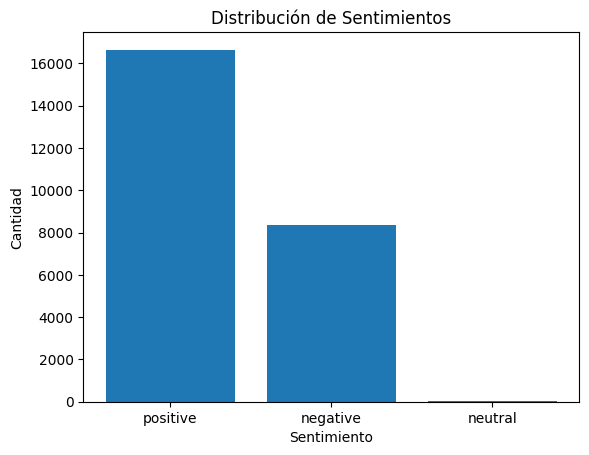

In [14]:
# Gráfico de barras
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

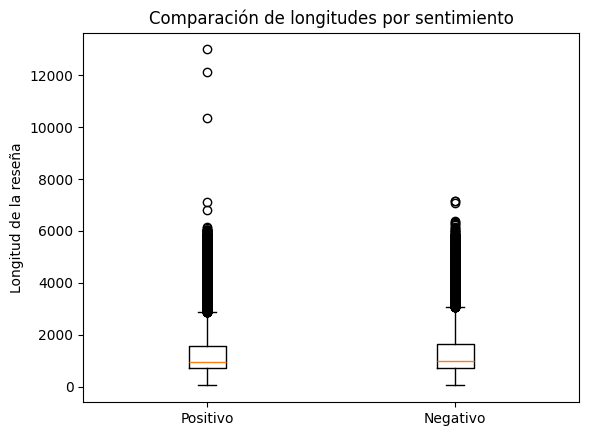

In [16]:
# Boxplot
plt.boxplot([df[df['sentiment'] == 'positive']['review'].str.len(),
             df[df['sentiment'] == 'negative']['review'].str.len()])
plt.xticks([1, 2], ['Positivo', 'Negativo'])
plt.ylabel('Longitud de la reseña')
plt.title('Comparación de longitudes por sentimiento')
plt.show()

In [17]:
# Tokenizar y eliminar stop words
from nltk.tokenize import word_tokenize

def get_word_counts(df, sentiment):
    words = []
    for review in df[df['sentiment'] == sentiment]['review']:
        words.extend(word_tokenize(review))

    # Eliminar stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Contar palabras
    fdist = nltk.FreqDist(words)
    return fdist

# Obtener las palabras más comunes para cada sentimiento
common_words_positive = get_word_counts(df, 'positive').most_common(20)
common_words_negative = get_word_counts(df, 'negative').most_common(20)

# Crear una nube de palabras (ejemplo con WordCloud)
# ... (requiere la instalación de WordCloud)

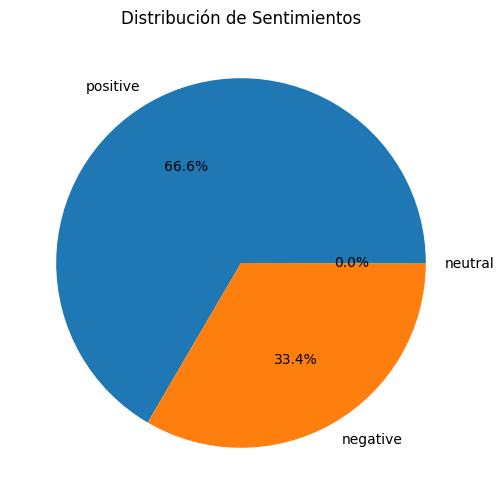

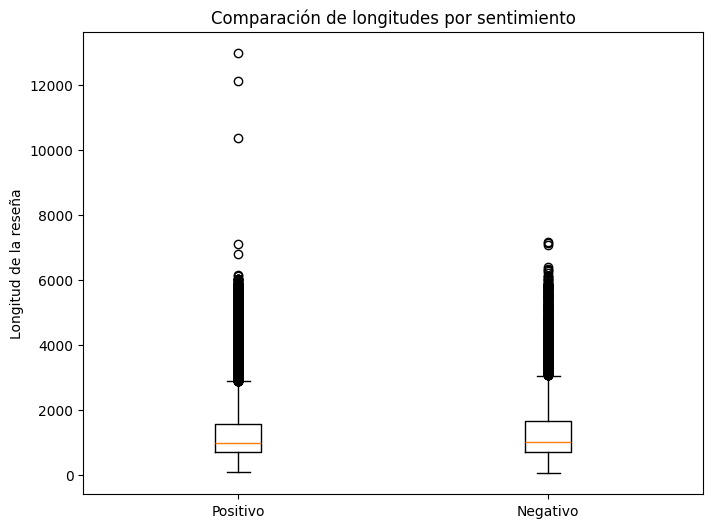

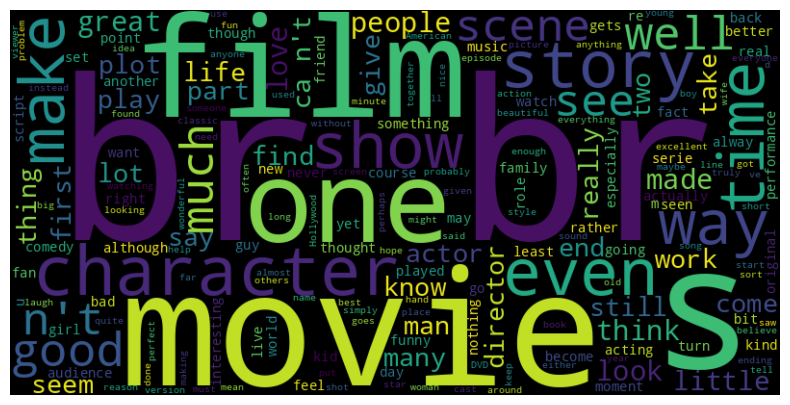

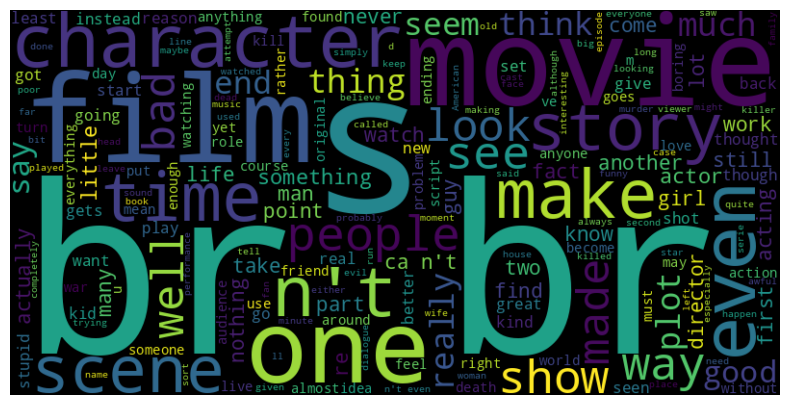

[(('<', 'br'), 65520), (('br', '/'), 65520), (('/', '>'), 65520), (('>', '<'), 32778), (('of', 'the'), 25094), ((',', 'and'), 20294), (('.', 'The'), 16226), (('in', 'the'), 15245), ((',', 'but'), 14066), (('.', 'I'), 12591)]
[(('<', 'br', '/'), 35020), (('br', '/', '>'), 35020), (('/', '>', '<'), 17517), (('>', '<', 'br'), 17517), (('/', '>', 'The'), 2470), (('.', '<', 'br'), 1977), (('!', '!', '!'), 1424), (('.', 'It', "'s"), 1399), (('/', '>', 'I'), 1386), (('one', 'of', 'the'), 1379)]


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Suponiendo que tienes un DataFrame llamado 'df' con columnas 'sentiment' y 'review'

# 1. Visualización de la distribución de sentimientos
plt.figure(figsize=(8,6))
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de Sentimientos')
plt.show()

# 2. Análisis de la longitud de las reseñas
plt.figure(figsize=(8,6))
plt.boxplot([df[df['sentiment'] == 'positive']['review'].str.len(),
             df[df['sentiment'] == 'negative']['review'].str.len()])
plt.xticks([1, 2], ['Positivo', 'Negativo'])
plt.ylabel('Longitud de la reseña')
plt.title('Comparación de longitudes por sentimiento')
plt.show()

# 3. Identificación de las palabras más frecuentes (nube de palabras)
from nltk.tokenize import word_tokenize

def get_word_cloud(df, sentiment):
    words = []
    for review in df[df['sentiment'] == sentiment]['review']:
        words.extend(word_tokenize(review))

    # Eliminar stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    wordcloud = WordCloud(width=800, height=400).generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

get_word_cloud(df, 'positive')  # Nube de palabras para reseñas positivas
get_word_cloud(df, 'negative')  # Nube de palabras para reseñas negativas

# 4. Análisis de bigramas y trigramas (ejemplo con NLTK)
from nltk import bigrams, trigrams

def get_ngrams(df, sentiment, n=2):  # n=2 para bigramas, n=3 para trigramas
    words = []
    for review in df[df['sentiment'] == sentiment]['review']:
        words.extend(nltk.ngrams(word_tokenize(review), n))

    fdist = nltk.FreqDist(words)
    return fdist.most_common(10)

# Obtener los bigramas más comunes para reseñas positivas
positive_bigrams = get_ngrams(df, 'positive')
print(positive_bigrams)

# Obtener los trigramas más comunes para reseñas negativas
negative_trigrams = get_ngrams(df, 'negative', n=3)
print(negative_trigrams)

In [19]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Suponiendo que tienes un DataFrame llamado 'df' con columnas 'review' y 'sentiment'

# Preprocesamiento y vectorización
tokenizer = Tokenizer(num_words=10000)  # Ajusta el número de palabras según tu dataset
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=100)  # Ajusta la longitud máxima según tus datos

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)

# Construcción del modelo (ejemplo con LSTM)
model = Sequential()
model.add(Embedding(10000, 128))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluación del modelo
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion matrix:\n', confusion_mat)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-19-e4c513525f0a>", line 31, in <cell line: 31>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 56, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/optree/ops.py", line 752, in tree_map

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 57, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 822, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_2483]

In [23]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Suponiendo que tienes un DataFrame llamado 'df' con columnas 'review' y 'sentiment'

# 1. Encode the target variable 'sentiment' into numerical labels

# Create a LabelEncoder
le = LabelEncoder()

# Fit the encoder on the 'sentiment' column and transform it
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Preprocesamiento y vectorización
tokenizer = Tokenizer(num_words=10000)  # Ajusta el número de palabras según tu dataset
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=100)  # Ajusta la longitud máxima según tus datos

# División en conjuntos de entrenamiento y prueba
# Use the encoded sentiment for y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment_encoded'], test_size=0.2, random_state=42)

# Construcción del modelo (ejemplo con LSTM)
model = Sequential()
model.add(Embedding(10000, 128))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluación del modelo
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.0029 - loss: -5.2471 - val_accuracy: 8.0000e-04 - val_loss: -15.0872
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 3.8962e-04 - loss: -18.1228 - val_accuracy: 8.0000e-04 - val_loss: -26.4788
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 5.0636e-04 - loss: -28.6100 - val_accuracy: 8.0000e-04 - val_loss: -37.7870
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.0031 - loss: -47.0003 - val_accuracy: 0.0260 - val_loss: -53.5465
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.0342 - loss: -64.9790 - val_accuracy: 0.0108 - val_loss: -66.2289
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.0590 - loss: -86.1650 - val_accuracy: 0.0286 - val_loss: -83.4696
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.0531 - loss: -105.5770 - val_accuracy: 0.0542 - val_loss: -98.4263
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84

In [22]:
# ... (previous code)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)

# Specify 'macro' averaging for multiclass precision
precision = precision_score(y_test, y_pred, average='macro')  # Changed line

recall = recall_score(y_test, y_pred, average='macro')  # Changed line
f1 = f1_score(y_test, y_pred, average='macro')  # Changed line
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion matrix:\n', confusion_mat)

Accuracy: 0.0452
Precision: 0.23945844636970917
Recall: 0.21143085531574743
F1-score: 0.07570504706054579
Confusion matrix:
 [[ 224 1444    0]
 [   2    2    0]
 [  86 3242    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
